In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("rating.csv",usecols=['userId','movieId','rating'])

In [3]:
data.head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [4]:
data.shape

(20000263, 3)

In [5]:
df=data[0:100000]

In [6]:
df.shape

(100000, 3)

In [7]:
titles=pd.read_csv("movie.csv")

In [8]:
df2=pd.merge(titles,df,on="movieId")

In [9]:
df2.shape

(100000, 5)

In [10]:
df.head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [11]:
df2.head(5)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [12]:
movie_rating_count=df2.groupby(['title'])['rating'].count().reset_index().rename(columns={"rating":"Totalratingcount"})

In [13]:
movie_rating_count

,title,Totalratingcount
0,'Hellboy': The Seeds of Creation (2004),1
1,'Neath the Arizona Skies (1934),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",14
...,...,...
8220,"\\""Great Performances\""\"" Cats (1998)""",1
8221,eXistenZ (1999),35
8222,xXx (2002),22
8223,xXx: State of the Union (2005),4


In [14]:
final=df2.merge(movie_rating_count,on="title",how="left")

In [15]:
final.head(5)

,movieId,title,genres,userId,rating,Totalratingcount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,241
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,241
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,241
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,241
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,241


In [16]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Totalratingcount'>

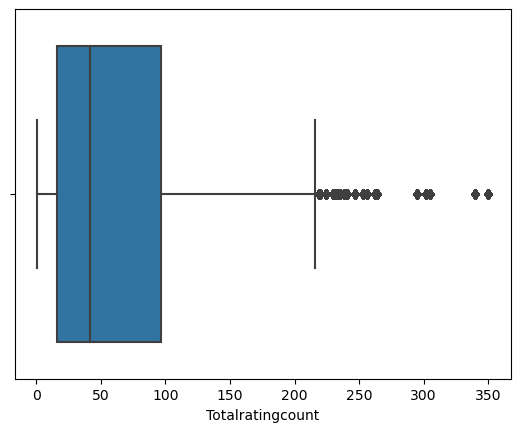

In [17]:
sns.boxplot(final['Totalratingcount'])

In [18]:
final['Totalratingcount'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100000 entries, 0 to 99999
Series name: Totalratingcount
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [32]:
final.head(10)

,movieId,title,genres,userId,rating,Totalratingcount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,241
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,241
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,241
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,241
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,241
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,241
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,241
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,241
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,241
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,241


In [33]:
final.to_csv(r"D:\datascience/clean_data.csv",index=False)

lets find quantiles for various percentages

In [19]:
final['Totalratingcount'].quantile(0.1)

5.0

10 percent observations less than 5.0

In [20]:
final['Totalratingcount'].quantile(0.5)

42.0

median is 42.0

In [21]:
for i in range(0,101,10):
    print(final['Totalratingcount'].quantile(i/100))

1.0
5.0
11.0
20.0
29.0
42.0
61.0
80.0
112.0
164.0
350.0


Filtering the data

In [22]:
final[final['Totalratingcount']>61]

,movieId,title,genres,userId,rating,Totalratingcount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,241
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,241
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,241
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,241
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,241
...,...,...,...,...,...,...
97939,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,633,4.0,63
97940,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,637,4.0,63
97941,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,672,2.5,63
97942,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,692,3.0,63


In [23]:
rating_popular_movie=final[final['Totalratingcount']>61]

In [24]:
rating_popular_movie.shape

(39494, 6)

# PIVOT TABLES 

In [25]:
rating_popular_movie.shape

(39494, 6)

In [26]:
moviemat=rating_popular_movie.pivot_table(index='userId',columns='title',values='rating')

In [27]:
moviemat.head(5)

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


# correlation with other movies

In [28]:
moviemat['12 Angry Men (1957)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
698    NaN
699    4.0
700    NaN
701    NaN
702    NaN
Name: 12 Angry Men (1957), Length: 697, dtype: float64

In [29]:
moviemat.corrwith(moviemat['12 Angry Men (1957)']).sort_values(ascending=False).head(5)

title
12 Angry Men (1957)             1.000000
Ed Wood (1994)                  0.743553
Graduate, The (1967)            0.682098
Minority Report (2002)          0.674878
Bowling for Columbine (2002)    0.657596
dtype: float64

In [30]:
def returncorrelatedmovies(movie):
    return moviemat.corrwith(moviemat[movie]).sort_values(ascending=False).head(5)

In [31]:
returncorrelatedmovies("12 Angry Men (1957)")

title
12 Angry Men (1957)             1.000000
Ed Wood (1994)                  0.743553
Graduate, The (1967)            0.682098
Minority Report (2002)          0.674878
Bowling for Columbine (2002)    0.657596
dtype: float64